<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# Python Basics ========================
import warnings, sys
warnings.filterwarnings('ignore', category=UserWarning)
sys.path.append('../library/')

# Custom ===============================
from lib_utils       import LibUtils       as Utils
from lib_gaia_query  import LibGaiaQuery   as GaiaQuery
from lib_interactive import LibInteractive as Interactive
from lib_cluster     import LibCluster     as Cluster
from lib_plotters    import LibPlotters    as Plotters
from lib_compare_2     import LibCompare     as Compare

# pyESASky =============================
from pyesasky.pyesasky import ESASkyWidget

from astropy.table            import Table

# Adjust cell size =====================
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>")) ## Adjust cell size as you wish

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
step_1 = True # Load Control Sample
step_2 = False # ESASky Plot
step_3 = False # Interactive/Dynamical Gaia Data exploration (Plotly)
step_4 = True # Clustering Analysis (HDSBCAN)

Sample Control loaded. N_elements (rows) = 144

Checking catalogue columns (ra, dec, parallax, pmra, phot_g_mean_mag, etc) - OK

Showing Sample Control first 5 rows:


col2mass,source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_flux_over_error,phot_rp_mean_flux_over_error,l,b,visibility_periods_used,radial_velocity,unit_weight_e,ruwe,distance,phot_g_mean_mag_abs,phot_bp_mean_mag_abs,phot_rp_mean_mag_abs,phot_g_mean_mag_err,phot_bp_mean_mag_err,phot_rp_mean_mag_err,X_gal,Y_gal,Z_gal,pm_mod
,,deg,deg,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,mag,mag,mag,,,,deg,deg,,km / s,,,pc,mag,mag,mag,mag,mag,mag,pc,pc,pc,
bytes16,int64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,int16,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64
03430679+3148204,216575791780899200,55.77832585931487,31.805676998022935,3.368292212211576,0.18569575746121944,4.153055103839073,0.24327365471569765,-7.238032874307061,0.1874717775215194,16.336063,18.711496,14.907626,627.83307,41.59013,198.40709,160.48133628908516,-18.274279107720577,9,--,1.8418794652984396,1.078421,296.8863557545719,8.973112190843308,11.348545158982956,7.544674957872116,0.0015927801,0.024044167,0.0050401427,-265.71249557733364,94.19114879201432,-93.09353047627064,8.344877865198118
03432622+3159286,216673162984386944,55.859323289998294,31.99127822034385,2.632751869978748,0.2504633438776319,4.608158705333078,0.4623583068436142,-6.940869193945712,0.2801396522260879,18.188923,20.33305,16.75615,508.76843,14.258361,157.91954,160.41233815127958,-18.08751919003965,9,--,1.1610862156055872,0.96449953,379.8307054314511,10.290972531622979,12.435099423712822,8.858198941535088,0.0019655307,0.07013429,0.006332339,-340.1660512901451,121.04514881599239,-117.92579991816214,8.331313931247678
03432774+3208314,216692099496268288,55.86564895264847,32.142068755211675,3.315366603457813,0.20983146461589036,4.584408968543563,0.43174948098974925,-7.2091046805227315,0.24425233421779075,17.565023,19.63398,16.151264,601.43933,24.294651,176.66731,160.31545184985518,-17.968026007948183,8,--,1.1918276439315283,0.94958436,301.6257686124468,10.167681214234388,12.236637589356459,8.753921982667006,0.0016626781,0.041161325,0.0056603565,-270.1482103718381,96.64487582456944,-93.04738954315665,8.543301228775526
03433205+3206172,216685949103101824,55.88362722579706,32.104790681581335,2.9996222049239414,0.05954141609718637,3.555695459980017,0.1183264543616157,-6.921575941462564,0.06722023993853171,14.828465,15.982068,13.762056,661.0584,126.30815,243.22202,160.35279023811825,-17.987003245808655,8,--,1.2506929608546613,1.0847275,333.375315850936,7.213798260914656,8.367400861012312,6.147389149891707,0.0015127256,0.007917145,0.0041114697,-298.6218375242565,106.61178748238133,-102.94671506249932,7.78146411143532
03433365+3201451,216673678380015232,55.89025861343185,32.029207864923364,3.2290728529141717,0.1792326043703605,4.7918714236640385,0.325847169733034,-7.534572612363947,0.20241032929788338,17.243881,--,--,416.147,--,--,160.40809188995905,-18.0415794082769,9,--,1.399380613109474,1.3609223,309.68641636484625,9.78927044302494,--,--,0.002402997,--,--,-277.4119577216782,98.73781033456953,-95.91207955341868,8.929267393908242


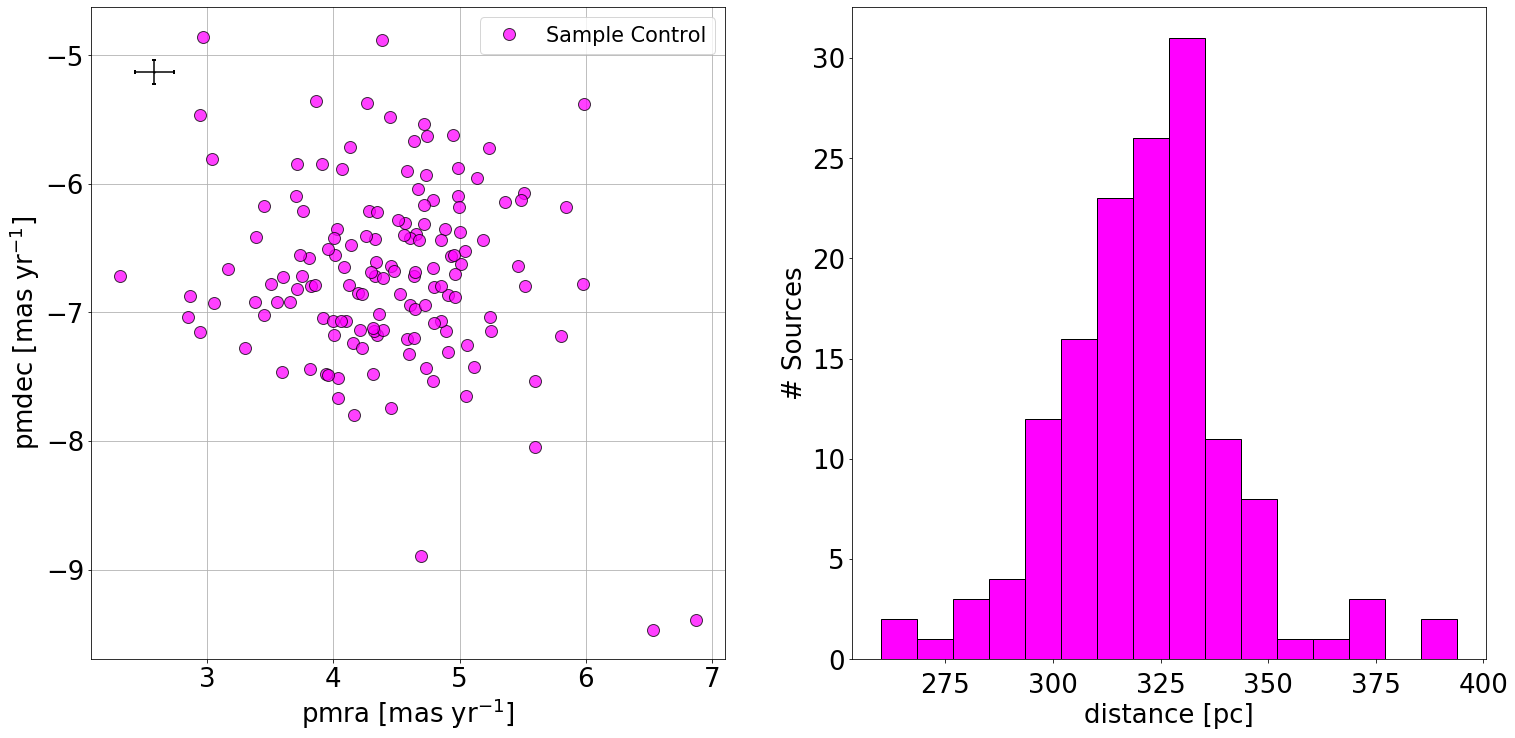

In [3]:
# Load Control Sample ==================================
if step_1:
    control = Utils(color = 'magenta', label = 'Sample Control')
    control.read_catalogue('../samples_control/sample_control_IC_348.vot') #     control.read_catalogue(sample_dir = '../samples_control/')
    control.display_N_rows(N_rows = 5, verbose = True)

    # Examine Velocity & Histograms ====================
    figures  = Plotters()
    figures.load_gaia_obj(control)
    figures.plot_2d_and_hist(col_x = 'pmra', col_y = 'pmdec', col_hist = 'distance')

In [4]:
# Load data sample for analysis ======================== 
sample_gaia = Utils(color = 'grey', label = 'test_run')
sample_gaia.read_catalogue('test_r6.vot', save_sample = True, print_vrad = True)
sample_gaia.display_N_rows(N_rows = 5, verbose = True)


# Show output in ESASky ================================
if step_2:
    figures  = Plotters()
    figures.load_gaia_obj(sample_gaia)
    figures.send_to_ESASky(esasky, color= 'white', radius = sample_gaia.ADQL['radii'].value)

test_run loaded. N_elements (rows) = 15870

Checking catalogue columns (ra, dec, parallax, pmra, phot_g_mean_mag, etc) - OK

vrad measurements for 1892 sources (11.9% of the sample)
vrad =               3.1 +/- 31.4 [km / s]

Saving test_run as: test_run.vot

Showing test_run first 5 rows:


source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_flux_over_error,phot_rp_mean_flux_over_error,l,b,visibility_periods_used,radial_velocity,unit_weight_e,ruwe,distance,phot_g_mean_mag_abs,phot_bp_mean_mag_abs,phot_rp_mean_mag_abs,phot_g_mean_mag_err,phot_bp_mean_mag_err,phot_rp_mean_mag_err,X_gal,Y_gal,Z_gal,pm_mod
,deg,deg,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,mag,mag,mag,,,,deg,deg,,km / s,,,pc,mag,mag,mag,mag,mag,mag,pc,pc,pc,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,int16,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64
219780455862399488,57.82177266461062,35.59957854596799,4.09046829572264,0.06737117285924715,23.66556014207734,0.13568134919233216,-8.37716775702434,0.08797167004695541,16.044447,17.258457,14.926005,1261.591,128.92241,365.10904,159.29382424358084,-14.276482737151378,14,--,1.22311208619371,1.0692753,244.47078615563154,9.103312099659849,10.31732233830731,7.984870517933775,0.0007926499,0.0077566034,0.0027389077,-221.61712253291284,83.76943166362472,-60.286802888673165,25.10449514464706
219796742378266880,58.000035974794535,36.03994716148703,3.2626959098756245,0.03847702390182899,9.652849577623115,0.08220739090385086,11.09211036227406,0.05004474721781466,15.23438,16.088696,14.330253,2763.771,361.66858,707.83203,159.1123641302523,-13.847723602671952,14,--,0.9791364304471641,1.0048137,306.49500524188306,7.802262760943844,8.656578518695309,6.898135639972164,0.00036182447,0.0027649624,0.0014127645,-278.02982969854736,106.100527499676,-73.35720891847775,14.704163262732305
219882981023628032,57.48963375182945,35.75798362847583,3.185570151950399,0.210441141768501,-22.53777246065641,0.4014672895695916,-26.018239203735824,0.2674659122094431,18.40171,19.782124,17.242495,693.6122,29.804174,114.810394,158.97576962811118,-14.330313276514556,14,--,1.1133877560434011,1.0176933,313.9155480182219,10.917646377575704,12.298059432995625,9.75843045045168,0.0014417279,0.03355235,0.008710013,-283.90053642070643,109.1169805539112,-77.69775583897568,34.42237584408052
219743239967120512,58.816455517044226,35.778915583140986,3.22666567850877,0.25476745086116764,8.59777625977895,0.4631184239778117,-14.405986711889778,0.288942728790834,18.523275,19.952806,17.294306,644.45306,16.112251,141.81386,159.80304787918493,-13.612728642416776,13,--,1.071998971831815,0.9708059,309.9174502832776,11.067045223302241,12.49657632071435,9.838075649327632,0.0015517034,0.062064573,0.007051497,-282.6904028728314,103.99274317020007,-72.9415621002246,16.776597085117213
219797670091463552,58.361614375673284,35.77680434364261,3.1011178471538865,0.18124888727380015,17.286960420222936,0.36478271676593504,-21.737794900637176,0.24098992132663508,17.948233,19.438465,16.723017,793.438,23.121645,237.75497,159.51777477918827,-13.856404570471721,14,--,1.1726121145967572,1.0507003,322.4643658472283,10.405824002737024,11.896056470388391,9.18060809087179,0.0012603379,0.043249518,0.004206011,-293.2876345303556,109.55206016474337,-77.22678801105292,27.77356166775378


Scaled data saved as: test_run_scl_standard.vot


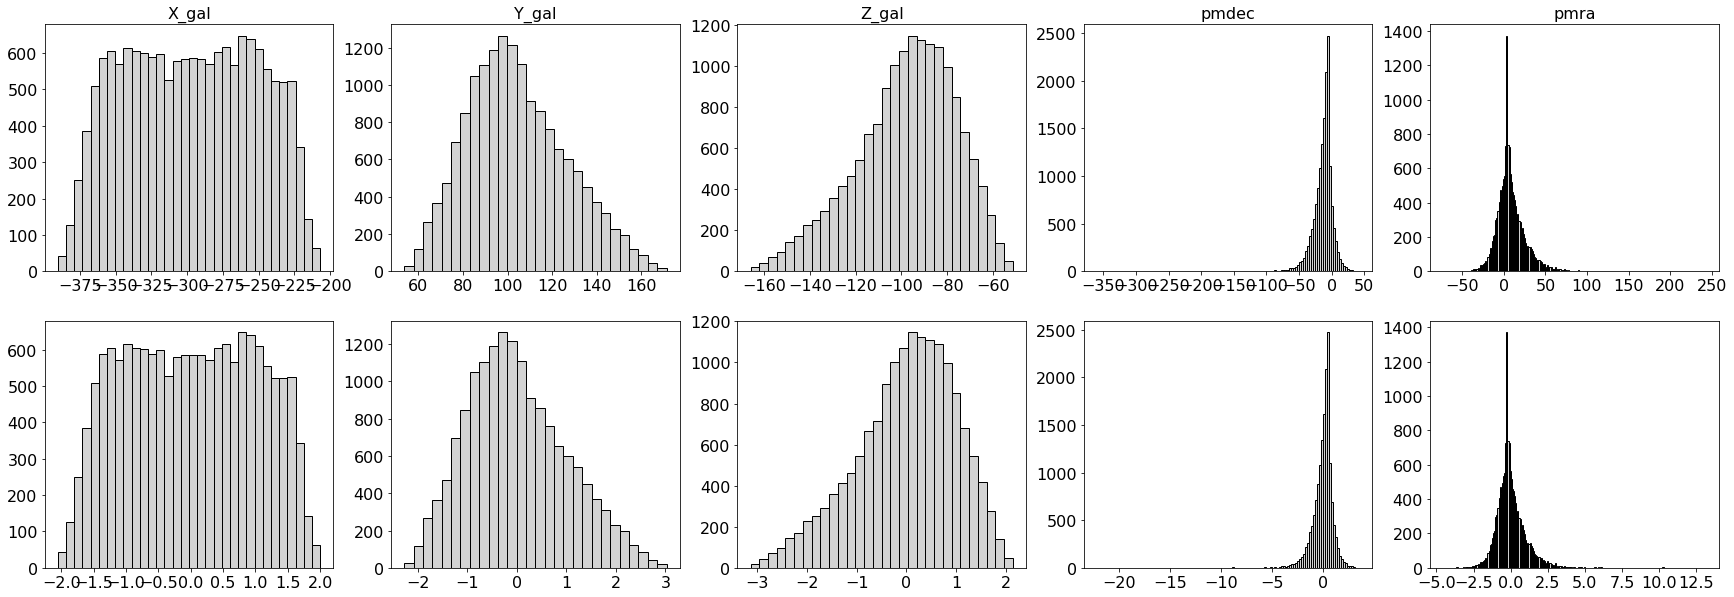

PDF saved as: test_run_scl_standard.pdf


In [5]:
# Data Scaling =========================================
if step_4:
    data_clustering = Cluster()
    data_clustering.load_gaia_obj(sample_gaia, scl_features = ['X_gal', 'Y_gal', 'Z_gal', 'pmdec', 'pmra'], scaler = 'standard')


Running HDBSCAN for mCls = 40:60 in steps of 5

Probability thresold set to:   80%
minSamples set to:               5

mCls = 40; clusters = 6; N_members = [147, 115, 87, 81, 53, 40]
mCls = 45; clusters = 5; N_members = [150, 147, 145, 89, 53]
mCls = 50; clusters = 5; N_members = [150, 145, 141, 123, 53]
mCls = 55; clusters = 4; N_members = [150, 145, 142, 123]


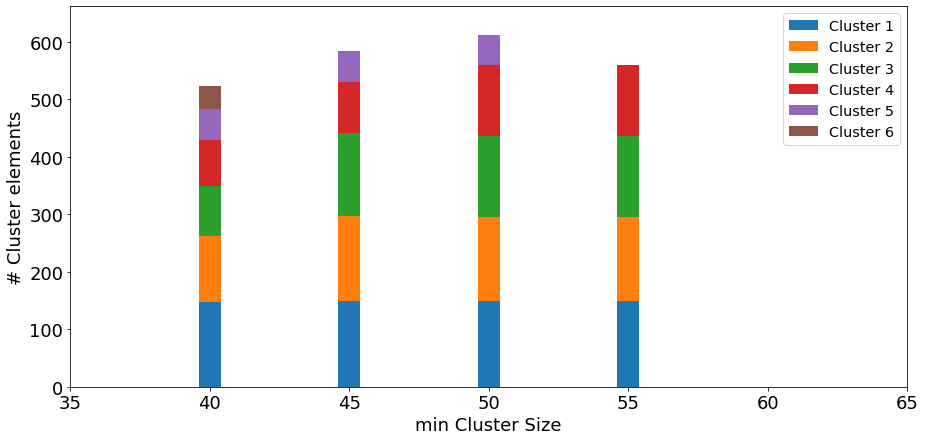

PDF saved as: test_run_hdb_minsamp_5_prob_0.8.pdf


In [6]:
# Apply HDSBCAN ========================================
if step_4:
#     data_clustering.run_multi_hdbscan(probability = None, min_samples = -1)
#     data_clustering.run_multi_hdbscan(probability = 0.8, min_samples = 5)
    data_clustering.run_multi_hdbscan(probability = 0.8, min_samples = 5, mCls_min = 40, mCls_max = 60, mCls_step = 5)
    data_clustering.plot_multi_hdbscan_stats()

Insert min_Cluster_size: 50
mCls = 50; clusters = 5; N_members = [150, 145, 141, 123, 53]







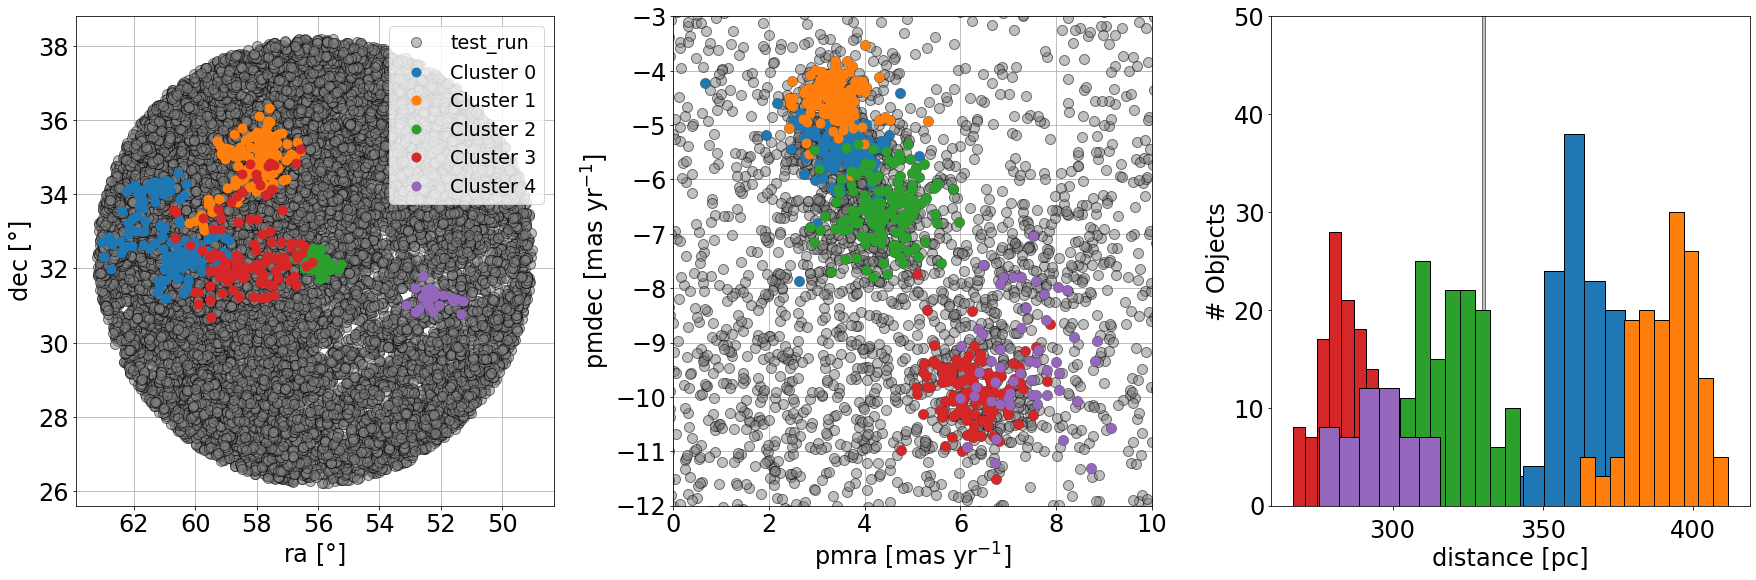

In [7]:
# Show selected HDBSCAN results ========================
if step_4:
    data_clustering.run_hdbscan(probability = data_clustering.probability, min_samples=data_clustering.min_samples, verbose = True)
    data_clustering.plot_clusters(ylim_3=[0,50])

    if step_2:
        data_clustering.send_to_ESASky(esasky, radius = sample_gaia.ADQL['radii'].value)

Comparing HDBSCAN clusters to Control Sample:
Cluster 0 contains   150 Elements, including 0 ( 0.0%) of the Control Sample
Cluster 1 contains   145 Elements, including 0 ( 0.0%) of the Control Sample
Cluster 2 contains   141 Elements, including 108 (75.0%) of the Control Sample
Cluster 3 contains   123 Elements, including 0 ( 0.0%) of the Control Sample
Cluster 4 contains    53 Elements, including 0 ( 0.0%) of the Control Sample







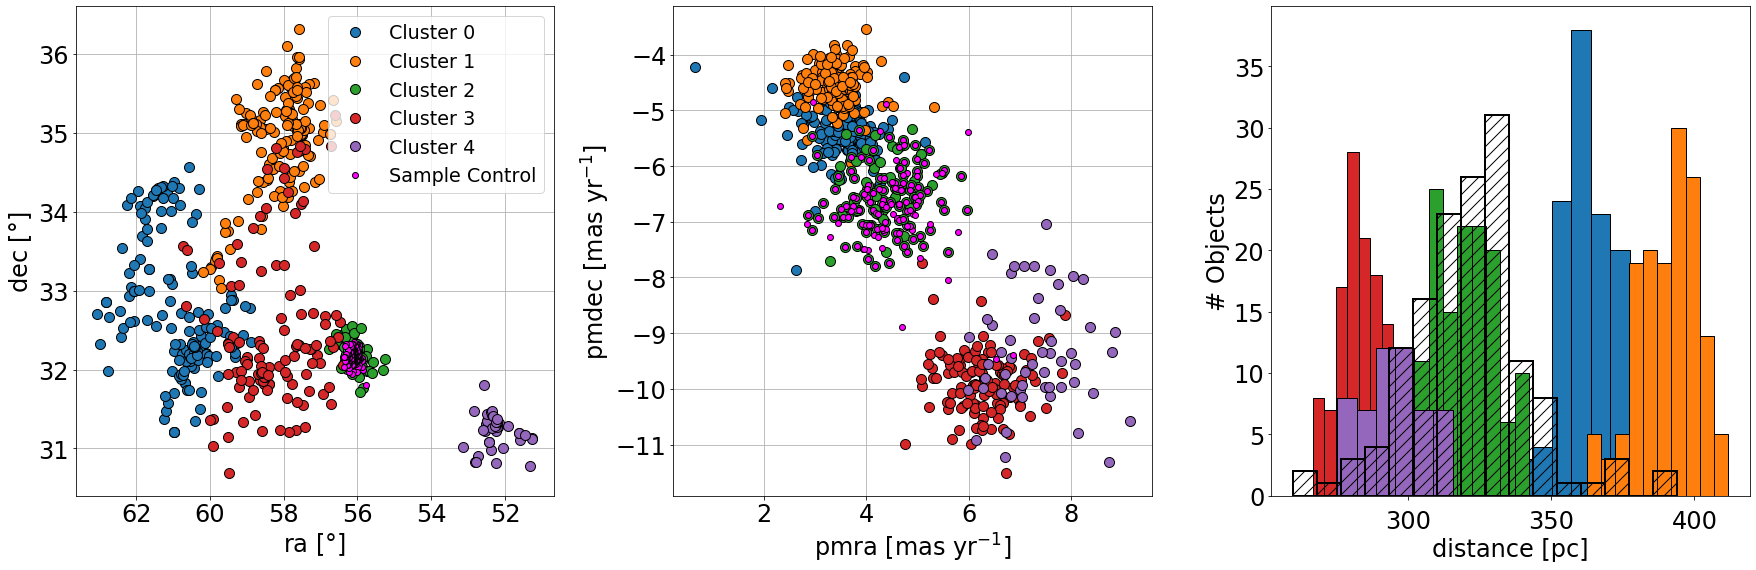

PDF saved as: test_run_hdb_minsamp_5_prob_0.8_.pdf


In [8]:
# Cluster Comparison ===================================
if step_1 and step_4:
    comp = Compare()
    comp.read_control(control)
    comp.read_clusters(data_clustering, verbose = False)
    comp.compare_to_control(verbose = True)
    comp.plot_clusters_comp()

In [9]:
# # MERGE THIS CELL WITH PREVIOUS ONE AND SAVE THEM ALL.
# if step_4:
#     data_clustering.save_cluster()